<img src="https://habrastorage.org/webt/ia/m9/zk/iam9zkyzqebnf_okxipihkgjwnw.jpeg" />
    
**<center>[mlcourse.ai](https://mlcourse.ai) – Open Machine Learning Course** </center><br>
Authors: Arina Lopukhova (@erynn), and [Yury Kashnitsky](https://yorko.github.io) (@yorko). Edited by Vadim Shestopalov (@vchulski). [mlcourse.ai](https://mlcourse.ai) is powered by [OpenDataScience (ods.ai)](https://ods.ai/) © 2017—2022

# <center>Assignment #1. Task </center> <a class="tocSkip">
## <center>Exploratory Data Analysis (EDA) of Olympic games with Pandas </center> <a class="tocSkip">
    
<img src="https://habrastorage.org/webt/my/70/d9/my70d97xhwfj8krp2q2qmn_smww.png" width=50%>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


There are ten questions about 120 years of Olympic history in this assignment.

### Your task is to:
 1. write code and perform computations in the cells below;
 2. choose answers in the [webform](https://docs.google.com/forms/d/1SJcNJxnY5Wwb_sDSxmb-FyghraeOt-ZmQMA0XzOLu4I).
 
*If you are sure that something is not 100% correct with the assignment/solution, please leave your feedback via the mentioned webform ↑*

-----

In [ ]:
from pathlib import Path

import pandas as pd

In [ ]:
PATH_TO_DATA = Path("/content/drive/MyDrive/mlcourse_ai_bonus_jupyter_book/_static/data/assignment1")

In [ ]:
df = pd.read_csv(PATH_TO_DATA / "athlete_events.csv.zip", index_col="ID")
df.head(2)

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
ID,,,,,,,,,,,,,,
1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


 The dataset has the following features:

- __ID__ – Unique number for each athlete
- __Name__ – Athlete's name
- __Sex__ – M or F
- __Age__ – Integer
- __Height__ – In centimeters
- __Weight__ – In kilograms
- __Team__ – Team name
- __NOC__ – National Olympic Committee 3-letter code
- __Games__ – Year and season
- __Year__ – Integer
- __Season__ – Summer or Winter
- __City__ – Host city
- __Sport__ – Sport
- __Event__ – Event
- __Medal__ – Gold, Silver, Bronze, or NA

**<font color='red'>Question 1.</font> How old were the youngest male and female participants of the 1992 Olympics?**

- 16 and 15
- 14 and 13 
- 13 and 11
- 11 and 12 +

In [ ]:
# male
youngest_male_1992 = df[(df['Sex'] == 'M') & (df['Year'] == 1992)]['Age'].min()
df[(df['Sex'] == 'M') & (df['Year'] == 1992) & (df['Age'] == youngest_male_1992)]

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
ID,,,,,,,,,,,,,,
37333,Carlos Bienvenido Front Barrera,M,11.0,NaN,NaN,Spain,ESP,1992 Summer,1992,Summer,Barcelona,Rowing,Rowing Men's Coxed Eights,NaN


In [ ]:
# female
youngest_female_1992 = df[(df['Sex'] == 'F') & (df['Year'] == 1992)]['Age'].min()
df[(df['Sex'] == 'F') & (df['Year'] == 1992) & (df['Age'] == youngest_female_1992)].drop_duplicates('Name')

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
ID,,,,,,,,,,,,,,
60854,Judit Kiss,F,12.0,171.0,57.0,Hungary,HUN,1992 Summer,1992,Summer,Barcelona,Swimming,Swimming Women's 400 metres Freestyle,NaN


**<font color='red'>Question 2.</font> What was the percentage of male basketball players among all the male participants of the 2012 Olympics? Round the answer to the first decimal.**

*Hint:* drop duplicate athletes where necessary to count each athlete just once. This applies to other questions as well.

- 0.2
- 1.5 
- 2.5 +
- 7.7

In [ ]:
mask = (df['Sex'] == 'M') & (df['Year'] == 2012)

all_male_2012 = df[mask].drop_duplicates(subset='Name')
basketball_male_2012 = df[mask & (df['Sport'] == 'Basketball')]

round(len(basketball_male_2012) / len(all_male_2012) * 100, 1)

2.5

**<font color='red'>Question 3.</font> What are the mean and standard deviation of height for female tennis players who participated in the 2000 Olympics? Round the answer to the first decimal.**

- 171.8 and 6.5 +
- 179.4 and 10
- 180.7 and 6.7
- 182.4 and 9.1 

In [ ]:
fem_tennis = df.query('(Sex == "F") & (Sport == "Tennis") & (Year == 2000)').drop_duplicates('Name')
print(fem_tennis['Height'].mean(), fem_tennis['Height'].std())

171.8068181818182 6.5633218995693605


In [ ]:
#without drop duplicates
fem_tennis = df.query('(Sex == "F") & (Sport == "Tennis") & (Year == 2000)')
print(fem_tennis['Height'].mean(), fem_tennis['Height'].std())

171.792 6.4586725890776675


**<font color='red'>Question 4.</font> Find the heaviest athlete among 2006 Olympics participants. What sport did he or she do?**

- Judo
- Bobsleigh 
- Skeleton +
- Boxing

In [ ]:
# You code here (read-only in a JupyterBook, pls run jupyter-notebook to edit)
max_weight_2006 = df[df['Year'] == 2006]['Weight'].max()

df[(df['Year'] == 2006) & (df['Weight'] == max_weight_2006)]

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
ID,,,,,,,,,,,,,,
4476,Patrick R. Antaki,M,41.0,185.0,127.0,Lebanon,LIB,2006 Winter,2006,Winter,Torino,Skeleton,Skeleton Men's Skeleton,NaN


**<font color='red'>Question 5.</font> How many times did John Aalberg participate in the Olympics held in different years?**

- 0
- 1 
- 2 +
- 3 

In [ ]:
# You code here (read-only in a JupyterBook, pls run jupyter-notebook to edit)
df[df['Name'] == 'John Aalberg']['Games'].unique()

array(['1992 Winter', '1994 Winter'], dtype=object)

**<font color='red'>Question 6.</font> How many gold medals in tennis did the Switzerland team win at the 2008 Olympics?**

- 0
- 1 
- 2 +
- 3 

In [ ]:
# You code here (read-only in a JupyterBook, pls run jupyter-notebook to edit)
df[(df['Year'] == 2008) & (df['Team'] == 'Switzerland') & (df['Sport'] == 'Tennis')]['Medal'].value_counts()

Gold    2
Name: Medal, dtype: int64

**<font color='red'>Question 7.</font>  Is it true that Spain won fewer medals than Italy at the 2016 Olympics? Do not consider NaN values in the _Medal_ column.**

- Yes +
- No

In [ ]:
# You code here (read-only in a JupyterBook, pls run jupyter-notebook to edit)
df[(df['Year'] == 2016) & (df['Team'] == 'Spain')]['Medal'].value_counts()

Silver    19
Bronze    17
Gold       7
Name: Medal, dtype: int64

In [ ]:
df[(df['Year'] == 2016) & (df['Team'] == 'Italy')]['Medal'].value_counts()

Silver    38
Bronze    24
Gold       8
Name: Medal, dtype: int64

**<font color='red'>Question 8.</font> What are the least and most common age groups among the participants of the 2008 Olympics?**
- [45-55] and [25-35) correspondingly +
- [45-55] and [15-25) correspondingly 
- [35-45) and [25-35) correspondingly
- [45-55] and [35-45) correspondingly

In [ ]:
# You code here (read-only in a JupyterBook, pls run jupyter-notebook to edit)
df_2008 = df[df['Year'] == 2008].drop_duplicates('Name')
df_2008

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
ID,,,,,,,,,,,,,,
21,Ragnhild Margrethe Aamodt,F,27.0,163.0,NaN,Norway,NOR,2008 Summer,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold
49,Moonika Aava,F,28.0,168.0,65.0,Estonia,EST,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Women's Javelin Throw,NaN
63,Jos Luis Abajo Gmez,M,30.0,194.0,87.0,Spain,ESP,2008 Summer,2008,Summer,Beijing,Fencing,"Fencing Men's epee, Individual",Bronze
67,Mariya Vasilyevna Abakumova (-Tarabina),F,22.0,179.0,80.0,Russia,RUS,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Women's Javelin Throw,Silver
69,Tamara Abalde Daz,F,19.0,185.0,72.0,Spain,ESP,2008 Summer,2008,Summer,Beijing,Basketball,Basketball Women's Basketball,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135501,Ellina Aleksandrovna Zvereva (Kisheyeva-),F,47.0,183.0,100.0,Belarus,BLR,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Women's Discus Throw,NaN
135508,Vera Igorevna Zvonaryova,F,23.0,172.0,59.0,Russia,RUS,2008 Summer,2008,Summer,Beijing,Tennis,Tennis Women's Singles,Bronze
135528,Marc Zwiebler,M,24.0,181.0,75.0,Germany,GER,2008 Summer,2008,Summer,Beijing,Badminton,Badminton Men's Singles,NaN


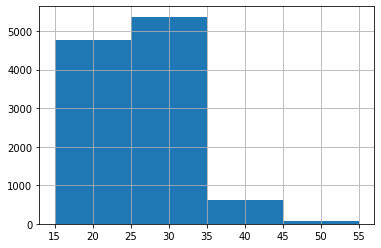

In [ ]:
df_2008['Age'].hist(bins=[15, 25, 35, 45, 55]);

**<font color='red'>Question 9.</font> Is it true that there were Summer Olympics held in Atlanta? Is it true that there were Winter Olympics held in Squaw Valley?**

- Yes, Yes +
- Yes, No
- No, Yes 
- No, No 

In [ ]:
# You code here (read-only in a JupyterBook, pls run jupyter-notebook to edit)
df[(df['City'] == 'Atlanta') & (df['Season'] == 'Summer')].sample(1)

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
ID,,,,,,,,,,,,,,
117669,Mariusz Szyszko,M,27.0,186.0,85.0,Poland,POL,1996 Summer,1996,Summer,Atlanta,Volleyball,Volleyball Men's Volleyball,NaN


In [ ]:
df[(df['City'] == 'Squaw Valley') & (df['Season'] == 'Winter')].sample(1)

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
ID,,,,,,,,,,,,,,
133907,Nilo Zandanel,M,22.0,167.0,63.0,Italy,ITA,1960 Winter,1960,Winter,Squaw Valley,Ski Jumping,"Ski Jumping Men's Normal Hill, Individual",NaN


**<font color='red'>Question 10.</font> What is the absolute difference between the number of unique sports at the 1994 Olympics and 2002 Olympics?**

- 3 +
- 10
- 15 
- 27 

In [ ]:
# You code here (read-only in a JupyterBook, pls run jupyter-notebook to edit)
unique_sports_1994 = df[df['Year'] == 1994]['Sport'].unique().shape[0]

In [ ]:
unique_sports_2002 = df[df['Year'] == 2002]['Sport'].unique().shape[0]

In [ ]:
abs(unique_sports_1994 - unique_sports_2002)

3